In [1]:
import pandas as pd

In [2]:
survey = pd.read_csv('Data/survey.csv')

In [3]:
#drop the unamed column
survey = survey.drop(['Unnamed: 0'], axis=1)
#view data
survey.head()

,dataid,status,foundation_pier_beam,foundation_slab,spend_time_at_home_none,spend_time_at_home_monday,spend_time_at_home_tuesday,spend_time_at_home_wednesday,spend_time_at_home_thursday,spend_time_at_home_friday,...,energy_development_hydropower,energy_development_bioenergy,can_reduce_energy_consumption,know_steps_reduce_energy_consumption,cannot_reduce_energy_consumption,individual_responsible_energy_reduce,energy_reduce_regulation,energy_reduce_risky,can_lower_energy_use,energy_reduce_other_ways
0,﻿18,Complete,NaN,Slab,NaN,Monday,NaN,NaN,NaN,Friday,...,NaN,NaN,Neither,Neither,Slightly disagree,Neither,Slightly agree,Strongly disagree,Strongly disagree,NaN
1,26,Complete,NaN,Slab,none,NaN,NaN,NaN,NaN,NaN,...,Slightly support,Strongly support,Slightly disagree,Strongly agree,Slightly agree,Slightly disagree,Slightly agree,Strongly disagree,Slightly agree,You should draw a distinction about summer and...
2,43,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,Strongly support,Slightly oppose,Slightly disagree,Strongly agree,Slightly disagree,Slightly agree,Strongly agree,Strongly disagree,Strongly agree,What price/value would you give to a battery b...
3,50,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,Strongly support,Neither,Slightly disagree,Strongly agree,Slightly disagree,Slightly agree,Slightly disagree,Slightly disagree,Slightly agree,NaN
4,125,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,Strongly support,Neither,Neither,Neither,Neither,Neither,Neither,Neither,Neither,NaN


In [4]:
survey = survey.loc[survey['status'] == "Complete"]


# Look at days spent at home

In [5]:
#create list for spend time a thome
time_at_home = survey.columns[5:10] 


In [6]:
def home_time (row):
    
    return len(row.loc[~row.isnull()])
    

In [7]:
survey['at_home'] = survey[time_at_home].apply(home_time, axis=1)

In [8]:
survey.head()

,dataid,status,foundation_pier_beam,foundation_slab,spend_time_at_home_none,spend_time_at_home_monday,spend_time_at_home_tuesday,spend_time_at_home_wednesday,spend_time_at_home_thursday,spend_time_at_home_friday,...,energy_development_bioenergy,can_reduce_energy_consumption,know_steps_reduce_energy_consumption,cannot_reduce_energy_consumption,individual_responsible_energy_reduce,energy_reduce_regulation,energy_reduce_risky,can_lower_energy_use,energy_reduce_other_ways,at_home
0,﻿18,Complete,NaN,Slab,NaN,Monday,NaN,NaN,NaN,Friday,...,NaN,Neither,Neither,Slightly disagree,Neither,Slightly agree,Strongly disagree,Strongly disagree,NaN,2
1,26,Complete,NaN,Slab,none,NaN,NaN,NaN,NaN,NaN,...,Strongly support,Slightly disagree,Strongly agree,Slightly agree,Slightly disagree,Slightly agree,Strongly disagree,Slightly agree,You should draw a distinction about summer and...,0
2,43,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,Slightly oppose,Slightly disagree,Strongly agree,Slightly disagree,Slightly agree,Strongly agree,Strongly disagree,Strongly agree,What price/value would you give to a battery b...,5
3,50,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,Neither,Slightly disagree,Strongly agree,Slightly disagree,Slightly agree,Slightly disagree,Slightly disagree,Slightly agree,NaN,5
4,125,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,Neither,Neither,Neither,Neither,Neither,Neither,Neither,Neither,NaN,5


In [9]:
import matplotlib.pyplot as plt
#import matplotlib as plt
survey.hist(column="at_home")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000143969F9160>]],
      dtype=object)

# look into income levels

In [10]:
def indexsort(value):
    if value.startswith("Less"):
        return 0
    list_of_elements = value.split(",")
    return int(list_of_elements[0][1:])   

     total_annual_income  dataid
8      Less than $10,000       1
0      $10,000 - $19,999       1
3      $20,000 - $34,999       5
5      $35,000 - $49,999       4
6      $50,000 - $74,999      23
7      $75,000 - $99,999      27
1    $100,000 - $149,999      75
2    $150,000 - $299,000      64
4  $300,000 - $1,000,000      19


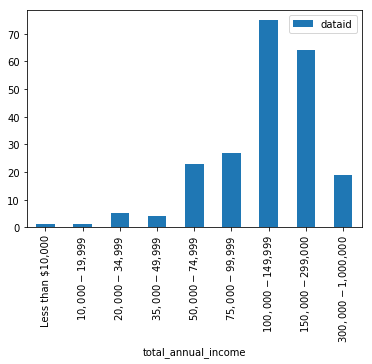

In [11]:

income = survey.groupby("total_annual_income").dataid.count()
income = pd.DataFrame(income).reset_index()
income['sortindex'] = income["total_annual_income"].apply(indexsort)

income = income.sort_values(by=["sortindex"])

income = income.drop(['sortindex'], axis=1)


print(income)

income.plot("total_annual_income", "dataid", kind="bar")

# look at residents

In [12]:
survey.columns[17:25]

Index(['residents_under_5', 'residents_6_to_12', 'residents_13_to_18',
       'residents_19_to_24', 'residents_25_to_34', 'residents_35_to_49',
       'residents_50_to_64', 'residents_65_and_older'],
      dtype='object')

In [13]:
survey["total_residents"] = survey[survey.columns[17:25]].sum(axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000143998224A8>]],
      dtype=object)

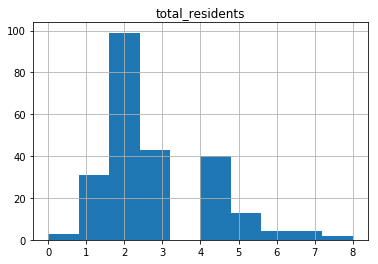

In [14]:
survey.hist(column="total_residents")

# look into education level

                        education_level  dataid
1                  High School graduate       1
3  Some college/trade/vocational school       3
0                      College graduate      81
2                   Postgraduate degree     154


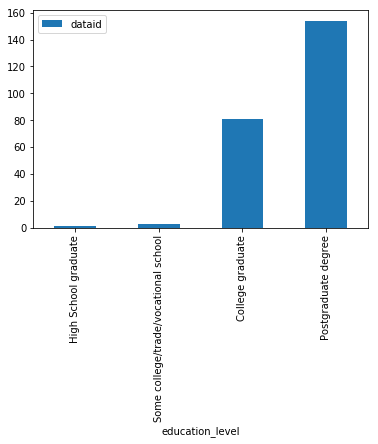

In [15]:

edu = survey.groupby("education_level").dataid.count()
edu = pd.DataFrame(edu).reset_index()
edu = edu.sort_values(by=["dataid"])

print(edu)


edu.plot("education_level", "dataid", kind="bar")

# Pv Systems

  pv_system_own  dataid
1           Yes     107
0            No     132


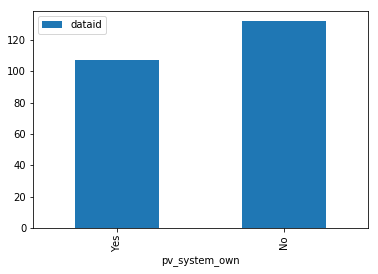

In [16]:
pv = survey.groupby("pv_system_own").dataid.count()
pv = pd.DataFrame(pv).reset_index()
pv = pv.sort_values(by=["dataid"])

print(pv)


pv.plot("pv_system_own", "dataid", kind="bar")

pv_system_satisfied
Neutral                   1
Somewhat dissatisfied     1
Somewhat satisfied       26
Very                     79
Name: dataid, dtype: int64


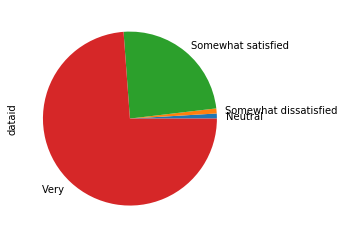

In [17]:
pv_satisifaction = survey.groupby("pv_system_satisfied").dataid.count()
#pv_satisifaction = pd.DataFrame(pv_satisifaction).reset_index()
#pv_satisifaction = pv_satisifaction.sort_values(by=["dataid"])

print(pv_satisifaction)


pv_satisifaction.plot( kind="pie")

# updates for energy efficiency

In [18]:
#create list for spend time a thome
energy_update = survey.columns[48:51] 
energy_update

Index(['retrofits_weather', 'hvac_sealed_duct_leak',
       'energy_efficient_windows'],
      dtype='object')

In [19]:
def updates (row):
    
    return len(row.loc[~row.isnull()])
  

In [20]:
survey['energy_updates'] = survey[energy_update].apply(updates, axis=1)

In [21]:
survey.head()

,dataid,status,foundation_pier_beam,foundation_slab,spend_time_at_home_none,spend_time_at_home_monday,spend_time_at_home_tuesday,spend_time_at_home_wednesday,spend_time_at_home_thursday,spend_time_at_home_friday,...,know_steps_reduce_energy_consumption,cannot_reduce_energy_consumption,individual_responsible_energy_reduce,energy_reduce_regulation,energy_reduce_risky,can_lower_energy_use,energy_reduce_other_ways,at_home,total_residents,energy_updates
0,﻿18,Complete,NaN,Slab,NaN,Monday,NaN,NaN,NaN,Friday,...,Neither,Slightly disagree,Neither,Slightly agree,Strongly disagree,Strongly disagree,NaN,2,1.0,0
1,26,Complete,NaN,Slab,none,NaN,NaN,NaN,NaN,NaN,...,Strongly agree,Slightly agree,Slightly disagree,Slightly agree,Strongly disagree,Slightly agree,You should draw a distinction about summer and...,0,2.0,0
2,43,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,Strongly agree,Slightly disagree,Slightly agree,Strongly agree,Strongly disagree,Strongly agree,What price/value would you give to a battery b...,5,2.0,0
3,50,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,Strongly agree,Slightly disagree,Slightly agree,Slightly disagree,Slightly disagree,Slightly agree,NaN,5,2.0,0
4,125,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,Neither,Neither,Neither,Neither,Neither,Neither,NaN,5,2.0,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014399BB2048>]],
      dtype=object)

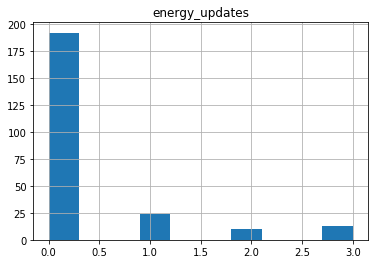

In [22]:
survey.hist("energy_updates")

# Temperature Settings

In [23]:
import numpy as np
def floatfunc(value):
    try: 
        return float(value)
    except ValueError:
        return np.nan
    
#survey["temp_setting_weekday_sleeping_hr_sumr"] = survey["temp_setting_weekday_sleeping_hr_sumr"].apply(floatfunc)


In [24]:
#convert to float
for i in survey.columns:
    if i.startswith("temp_setting"):
        survey[i] = survey[i].apply(floatfunc)
        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001439AD64E48>]],
      dtype=object)

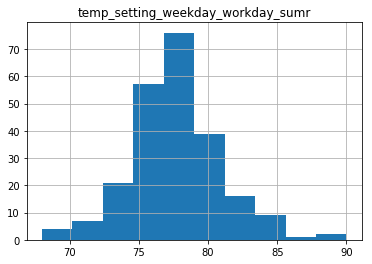

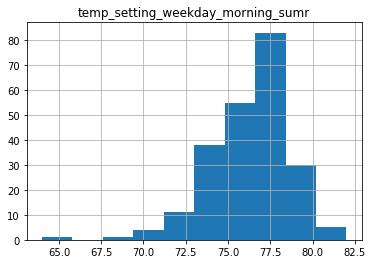

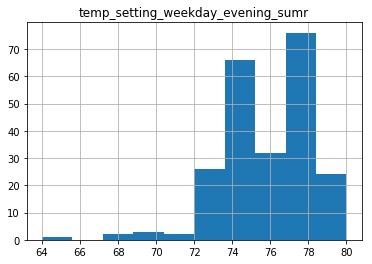

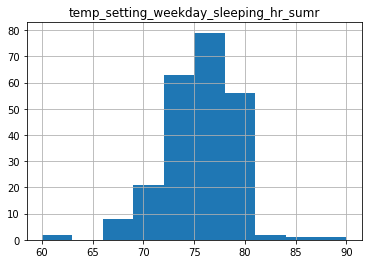

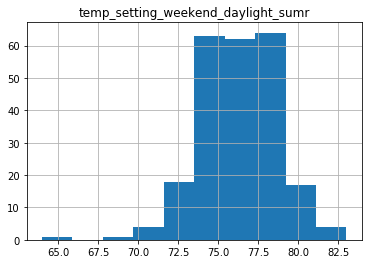

In [25]:
#plot temperatur
survey.hist("temp_setting_weekday_workday_sumr")
survey.hist("temp_setting_weekday_morning_sumr")
survey.hist("temp_setting_weekday_evening_sumr")
survey.hist("temp_setting_weekday_sleeping_hr_sumr")
survey.hist("temp_setting_weekend_daylight_sumr")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001439AFEB9B0>]],
      dtype=object)

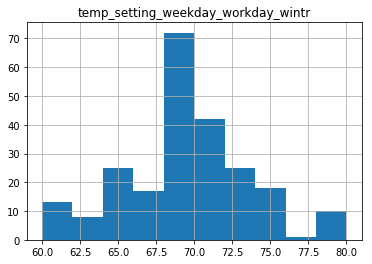

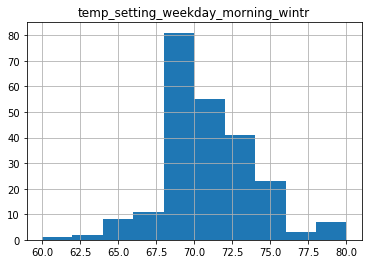

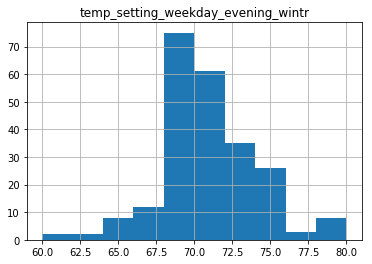

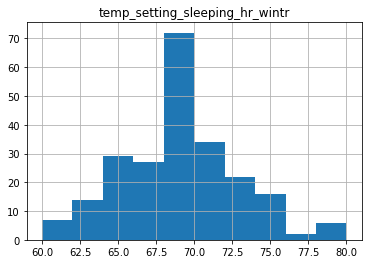

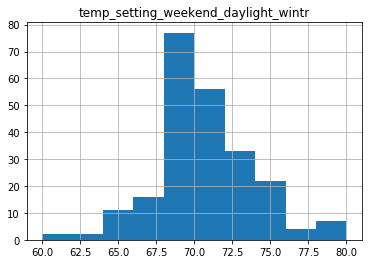

In [26]:
#plot temperatur
survey.hist("temp_setting_weekday_workday_wintr")
survey.hist("temp_setting_weekday_morning_wintr")
survey.hist("temp_setting_weekday_evening_wintr")
survey.hist("temp_setting_sleeping_hr_wintr")
survey.hist("temp_setting_weekend_daylight_wintr")


In [27]:
#find the median temperature for each
medians = {}

#convert to float
for i in survey.columns:
    if i.startswith("temp_setting"):
        medians[i] = survey[i].median()
        
print(medians)
        





{'temp_setting_weekday_workday_sumr': 78.0, 'temp_setting_weekday_morning_sumr': 77.0, 'temp_setting_weekday_evening_sumr': 76.0, 'temp_setting_weekday_sleeping_hr_sumr': 75.0, 'temp_setting_weekend_daylight_sumr': 76.5, 'temp_setting_weekday_workday_wintr': 68.0, 'temp_setting_weekday_morning_wintr': 70.0, 'temp_setting_weekday_evening_wintr': 70.0, 'temp_setting_sleeping_hr_wintr': 68.0, 'temp_setting_weekend_daylight_wintr': 70.0}


In [28]:
#identify IQR
quantile3 = {}
quantile1 = {}

#convert to float
for i in survey.columns:
    if i.startswith("temp_setting"):
        quantile3[i] = survey[i].quantile(.75) 
        quantile1[i] = survey[i].quantile(.25) 
        
print(quantile3, quantile1)





{'temp_setting_weekday_workday_sumr': 79.0, 'temp_setting_weekday_morning_sumr': 78.0, 'temp_setting_weekday_evening_sumr': 78.0, 'temp_setting_weekday_sleeping_hr_sumr': 78.0, 'temp_setting_weekend_daylight_sumr': 78.0, 'temp_setting_weekday_workday_wintr': 70.0, 'temp_setting_weekday_morning_wintr': 72.0, 'temp_setting_weekday_evening_wintr': 72.0, 'temp_setting_sleeping_hr_wintr': 70.0, 'temp_setting_weekend_daylight_wintr': 72.0} {'temp_setting_weekday_workday_sumr': 75.0, 'temp_setting_weekday_morning_sumr': 75.0, 'temp_setting_weekday_evening_sumr': 74.0, 'temp_setting_weekday_sleeping_hr_sumr': 73.0, 'temp_setting_weekend_daylight_sumr': 75.0, 'temp_setting_weekday_workday_wintr': 66.5, 'temp_setting_weekday_morning_wintr': 68.0, 'temp_setting_weekday_evening_wintr': 68.0, 'temp_setting_sleeping_hr_wintr': 66.0, 'temp_setting_weekend_daylight_wintr': 68.0}


In [29]:
#if summer and below 25% than -1, if 25-75% then 0 and if above 75% then 1


def energywaster(value, column):
    if value < quantile1[column]:
        return -1
    elif value > quantile3[column]:
        return 1
    else:
        return 0
    
#survey["temp_setting_weekday_workday_sumr"].apply(energywaster, args=("temp_setting_weekday_workday_sumr", ))


for i in survey.columns:
    if i.endswith("sumr"):
        survey[i+"energyconserver"] = survey[i].apply(energywaster, args=(i, ))
        


In [30]:
#if winter and below 25% than 1, if 25-75% then 0 and if above 75% then -1
def wintenergywaster(value, column):
    if value < quantile1[column]:
        return 1
    elif value > quantile3[column]:
        return -1
    else:
        return 0
    
for i in survey.columns:
    if i.endswith("wintr"):
        survey[i+"wintenergyconserver"] = survey[i].apply(wintenergywaster, args=(i, ))
        

In [31]:
#overall temperature user
energytempcols = [c for c in survey.columns if c.endswith("energyconserver")]

survey["temperatureUser"] = survey[energytempcols].sum(axis=1)

survey.head()

,dataid,status,foundation_pier_beam,foundation_slab,spend_time_at_home_none,spend_time_at_home_monday,spend_time_at_home_tuesday,spend_time_at_home_wednesday,spend_time_at_home_thursday,spend_time_at_home_friday,...,temp_setting_weekday_morning_sumrenergyconserver,temp_setting_weekday_evening_sumrenergyconserver,temp_setting_weekday_sleeping_hr_sumrenergyconserver,temp_setting_weekend_daylight_sumrenergyconserver,temp_setting_weekday_workday_wintrwintenergyconserver,temp_setting_weekday_morning_wintrwintenergyconserver,temp_setting_weekday_evening_wintrwintenergyconserver,temp_setting_sleeping_hr_wintrwintenergyconserver,temp_setting_weekend_daylight_wintrwintenergyconserver,temperatureUser
0,﻿18,Complete,NaN,Slab,NaN,Monday,NaN,NaN,NaN,Friday,...,0,0,0,0,0,0,0,0,0,1
1,26,Complete,NaN,Slab,none,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,1,0,0,0,0,2
2,43,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,0,0,0,0,1,1,1,1,1,5
3,50,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,0,0,0,0,-1,0,0,-1,0,-2
4,125,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,0,0,0,0,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001439B030668>]],
      dtype=object)

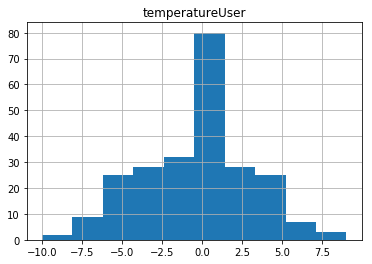

In [32]:
survey.hist("temperatureUser")

# Electric Vehicles

In [33]:
survey["any_electric_vehicle"] = survey["any_electric_vehicle"].map({'Yes':1, 'No':0})

any_electric_vehicle
0.0    180
1.0     56
Name: dataid, dtype: int64


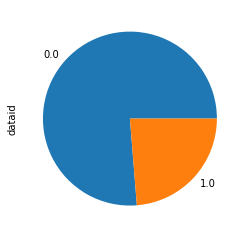

In [34]:
EV = survey.groupby("any_electric_vehicle").dataid.count()


print(EV)

EV.plot( kind="pie")



0%      37
100%    13
90%      2
95%      2
Name: vehicle_chargn_home, dtype: int64


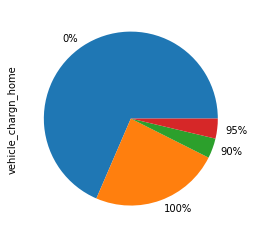

In [35]:
#charge at home
home_charge = survey['vehicle_chargn_home'].value_counts()

print(home_charge)

home_charge.plot(kind="pie")

0%      37
100%    13
95%      2
90%      2
Name: vehicle_chargn_home, dtype: int64


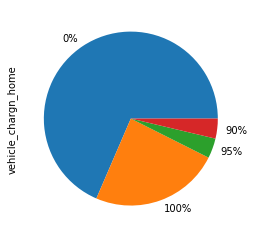

In [120]:
EVonly = survey.loc[survey['any_electric_vehicle'] == 1.0 ]
#charge at home
home_charge_EV = EVonly['vehicle_chargn_home'].value_counts()

print(home_charge_EV)

home_charge_EV.plot(kind="pie")

In [150]:
charge_at_home = home_charge_EV.to_frame().reset_index()
charge_at_home.head()


,index,vehicle_chargn_home
0,0%,37
1,100%,13
2,95%,2
3,90%,2


In [151]:
#recode to be yes, no and sometimes
charge_at_home["percentused"] = charge_at_home["index"]
charge_at_home['label'] = charge_at_home["percentused"].map({'0%':'no', '100%':'yes', '90%':'sometimes','95%':'sometimes'})
charge_at_home.head()

,index,vehicle_chargn_home,percentused,label
0,0%,37,0%,no
1,100%,13,100%,yes
2,95%,2,95%,sometimes
3,90%,2,90%,sometimes


In [152]:
charge_at_home =charge_at_home.drop("index", axis=1)

charge_at_home = charge_at_home.drop("percentused", axis=1)
print(charge_at_home)

   vehicle_chargn_home      label
0                   37         no
1                   13        yes
2                    2  sometimes
3                    2  sometimes


In [153]:
#groupby label
charge_at_home = charge_at_home.groupby(['label'])['vehicle_chargn_home'].sum()
charge_at_home

label
no           37
sometimes     4
yes          13
Name: vehicle_chargn_home, dtype: int64

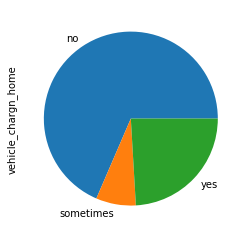

In [154]:
charge_at_home.plot(kind="pie")

100%    26
0%      11
95%      4
90%      3
20%      2
10%      2
40%      1
25%      1
75%      1
Name: vehicle_chargn_level2ev, dtype: int64
100%    26
0%      11
95%      4
90%      3
20%      2
10%      2
40%      1
25%      1
75%      1
Name: vehicle_chargn_level2ev, dtype: int64


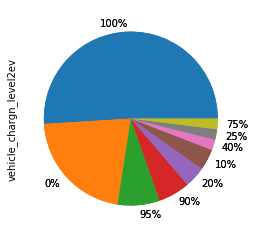

In [112]:
#charge at level2
chargelevel2 = survey['vehicle_chargn_level2ev'].value_counts()

print(chargelevel2)

chargelevel2.plot(kind="pie")

#make sure it is for EV only
chargelevel2EV = EVonly['vehicle_chargn_level2ev'].value_counts()

print(chargelevel2EV)

chargelevel2EV.plot(kind="pie")


0%     34
5%      9
10%     5
25%     1
75%     1
Name: vehicle_chargn_public, dtype: int64


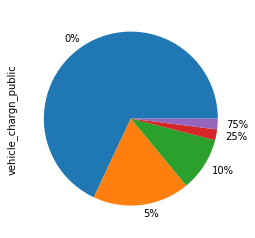

In [38]:
#charge in public
charge_public = survey['vehicle_chargn_public'].value_counts()

print(charge_public)

charge_public.plot(kind="pie")

0%     43
75%     2
5%      1
90%     1
85%     1
40%     1
Name: vehicle_chargn_work, dtype: int64


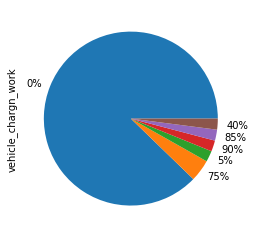

In [39]:
#charge at work
charge_work = survey['vehicle_chargn_work'].value_counts()

print(charge_work)

charge_work.plot(kind="pie")

No                  125
Yes                  52
I work from home     51
Name: vehicle_chargn_work_avail, dtype: int64


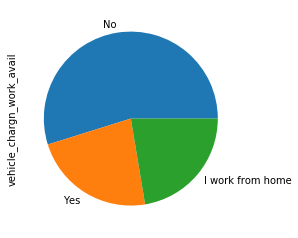

In [40]:
#charge at work available
charge_work_available = survey['vehicle_chargn_work_avail'].value_counts()

print(charge_work_available)

charge_work_available.plot(kind="pie")

When I arrive home                                                                                                        30
I have pre-set a delayed charge through my vehicle's telematics service (e.g. OnStar for Volts and CarWings for Leafs)    13
I manually delay the time I start charging my vehicle                                                                     11
Name: vehicle_chargn_time, dtype: int64


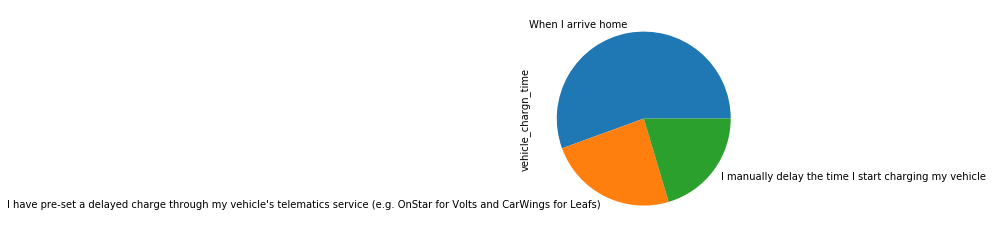

In [41]:
#charge time
charge_time = survey['vehicle_chargn_time'].value_counts()

print(charge_time)

charge_time.plot(kind="pie")

In [42]:
#reason to buy
reason = survey['electric_vehicle_buy_reason_envir'].value_counts()

print(reason)
print('total', len(survey))





Environmental benefit    52
Name: electric_vehicle_buy_reason_envir, dtype: int64
total 239


# Devices

In [43]:
have_devices = survey.columns[109:121]
have_devices

Index(['have_dishwasher', 'have_clotheswasher_front_load',
       'have_clotheswasher_top_load', 'have_water_softner', 'have_icemaker',
       'have_swimming_pool', 'have_hot_tub', 'have_outdoor_sprinkler',
       'have_landscape_water_feature', 'have_automated_drip_irrigation',
       'have_water_garden', 'have_other_water_using_appliance'],
      dtype='object')

In [44]:
def devices (row):
    
    return len(row.loc[~row.isnull()])
    

In [45]:
survey['devices_have'] = survey[have_devices].apply(devices, axis=1)
survey.head()

,dataid,status,foundation_pier_beam,foundation_slab,spend_time_at_home_none,spend_time_at_home_monday,spend_time_at_home_tuesday,spend_time_at_home_wednesday,spend_time_at_home_thursday,spend_time_at_home_friday,...,temp_setting_weekday_evening_sumrenergyconserver,temp_setting_weekday_sleeping_hr_sumrenergyconserver,temp_setting_weekend_daylight_sumrenergyconserver,temp_setting_weekday_workday_wintrwintenergyconserver,temp_setting_weekday_morning_wintrwintenergyconserver,temp_setting_weekday_evening_wintrwintenergyconserver,temp_setting_sleeping_hr_wintrwintenergyconserver,temp_setting_weekend_daylight_wintrwintenergyconserver,temperatureUser,devices_have
0,﻿18,Complete,NaN,Slab,NaN,Monday,NaN,NaN,NaN,Friday,...,0,0,0,0,0,0,0,0,1,3
1,26,Complete,NaN,Slab,none,NaN,NaN,NaN,NaN,NaN,...,0,0,1,1,0,0,0,0,2,4
2,43,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,0,0,0,1,1,1,1,1,5,2
3,50,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,0,0,0,-1,0,0,-1,0,-2,5
4,125,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,0,0,0,0,0,0,0,0,0,8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001439AE424A8>]],
      dtype=object)

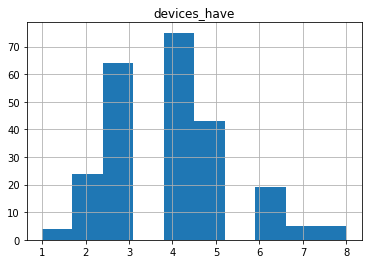

In [46]:
survey.hist(column="devices_have")

# energy Saving

In [47]:
#look at energy saving features
energy_saving = survey.columns[148:159]
energy_saving

Index(['energy_saving_led', 'energy_saving_attic_insulation',
       'energy_saving_efficient_windows', 'energy_saving_efficient_furnace',
       'energy_saving_efficient_ac', 'energy_saving_efficient_water_heater',
       'energy_saving_efficient_thermostat', 'energy_saving_add_caulking',
       'energy_saving_replace_showerhead', 'energy_saving_renewable_sys',
       'energy_saving_other'],
      dtype='object')

In [48]:
def saving_energy (row):
    
    return len(row.loc[~row.isnull()])
    

In [49]:
survey['energy_savings'] = survey[energy_saving].apply(saving_energy, axis=1)
survey.head()

,dataid,status,foundation_pier_beam,foundation_slab,spend_time_at_home_none,spend_time_at_home_monday,spend_time_at_home_tuesday,spend_time_at_home_wednesday,spend_time_at_home_thursday,spend_time_at_home_friday,...,temp_setting_weekday_sleeping_hr_sumrenergyconserver,temp_setting_weekend_daylight_sumrenergyconserver,temp_setting_weekday_workday_wintrwintenergyconserver,temp_setting_weekday_morning_wintrwintenergyconserver,temp_setting_weekday_evening_wintrwintenergyconserver,temp_setting_sleeping_hr_wintrwintenergyconserver,temp_setting_weekend_daylight_wintrwintenergyconserver,temperatureUser,devices_have,energy_savings
0,﻿18,Complete,NaN,Slab,NaN,Monday,NaN,NaN,NaN,Friday,...,0,0,0,0,0,0,0,1,3,1
1,26,Complete,NaN,Slab,none,NaN,NaN,NaN,NaN,NaN,...,0,1,1,0,0,0,0,2,4,3
2,43,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,0,0,1,1,1,1,1,5,2,4
3,50,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,0,0,-1,0,0,-1,0,-2,5,6
4,125,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,0,0,0,0,0,0,0,0,8,9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001439AF542B0>]],
      dtype=object)

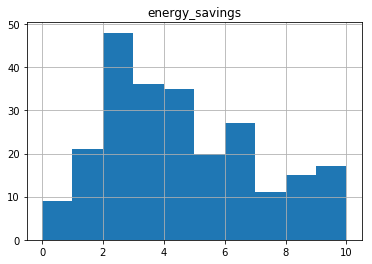

In [50]:
survey.hist(column="energy_savings")

# Energy Development

In [51]:
#energy sources

#divide enrgy sources into clean and not clean based on eia.gov explnatnion of renewable energy

#clean: wind, natural gas, natural_gas_shale, nuclear, solar, hydropower, bioenergy
#notsoclean: oil, coal

#if support renewable get 1, if netural get 0, if opposed get -1
#if supoprt nonrenwable get -1, if netural get 0, if opposed get 1

survey["oil"] = survey["energy_development_oil"].map({'Slightly support':-1, 'Strongly support':-1, 'Neither':0, 'Slightly oppose':1, 'Strongly oppose':1})
survey["coal"] = survey["energy_development_coal"].map({'Slightly support':-1, 'Strongly support':-1, 'Neither':0, 'Slightly oppose':1, 'Strongly oppose':1})

survey["wind"] = survey["energy_development_wind"].map({'Slightly support':1, 'Strongly support':1, 'Neither':0, 'Slightly oppose':-1, 'Strongly oppose':-1})
survey["natural_gas"] = survey["energy_development_natural_gas"].map({'Slightly support':1, 'Strongly support':1, 'Neither':0, 'Slightly oppose':-1, 'Strongly oppose':-1})
survey["natural_gas_shale"] = survey["energy_development_natural_gas_shale"].map({'Slightly support':1, 'Strongly support':1, 'Neither':0, 'Slightly oppose':-1, 'Strongly oppose':-1})
survey["nuclear"] = survey["energy_development_nuclear"].map({'Slightly support':1, 'Strongly support':1, 'Neither':0, 'Slightly oppose':-1, 'Strongly oppose':-1})
survey["solar"] = survey["energy_development_solar"].map({'Slightly support':1, 'Strongly support':1, 'Neither':0, 'Slightly oppose':-1, 'Strongly oppose':-1})
survey["hydropower"] = survey["energy_development_hydropower"].map({'Slightly support':1, 'Strongly support':1, 'Neither':0, 'Slightly oppose':-1, 'Strongly oppose':-1})
survey["bioenergy"] = survey["energy_development_bioenergy"].map({'Slightly support':1, 'Strongly support':1, 'Neither':0, 'Slightly oppose':-1, 'Strongly oppose':-1})

survey.head()

,dataid,status,foundation_pier_beam,foundation_slab,spend_time_at_home_none,spend_time_at_home_monday,spend_time_at_home_tuesday,spend_time_at_home_wednesday,spend_time_at_home_thursday,spend_time_at_home_friday,...,energy_savings,oil,coal,wind,natural_gas,natural_gas_shale,nuclear,solar,hydropower,bioenergy
0,﻿18,Complete,NaN,Slab,NaN,Monday,NaN,NaN,NaN,Friday,...,1,1.0,1.0,1.0,NaN,NaN,-1.0,NaN,NaN,NaN
1,26,Complete,NaN,Slab,none,NaN,NaN,NaN,NaN,NaN,...,3,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
2,43,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,4,1.0,NaN,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
3,50,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,6,-1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
4,125,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,9,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [52]:
#look at energy development
developing_energy = survey.columns[195:204]
developing_energy

Index(['oil', 'coal', 'wind', 'natural_gas', 'natural_gas_shale', 'nuclear',
       'solar', 'hydropower', 'bioenergy'],
      dtype='object')

In [53]:
#sum the energy development 

survey["development"] = survey[survey.columns[195:204]].sum(axis=1)
survey.head()

,dataid,status,foundation_pier_beam,foundation_slab,spend_time_at_home_none,spend_time_at_home_monday,spend_time_at_home_tuesday,spend_time_at_home_wednesday,spend_time_at_home_thursday,spend_time_at_home_friday,...,oil,coal,wind,natural_gas,natural_gas_shale,nuclear,solar,hydropower,bioenergy,development
0,﻿18,Complete,NaN,Slab,NaN,Monday,NaN,NaN,NaN,Friday,...,1.0,1.0,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,2.0
1,26,Complete,NaN,Slab,none,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,3.0
2,43,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,1.0,NaN,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0
3,50,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,-1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,4.0
4,125,Complete,NaN,Slab,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,...,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001439ACCA710>]],
      dtype=object)

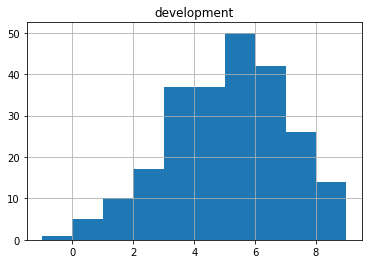

In [54]:
survey.hist(column="development")

# knows how to reduce energy

Slightly agree       108
Strongly agree        72
Neither               27
Slightly disagree     26
Strongly disagree      2
Name: know_steps_reduce_energy_consumption, dtype: int64


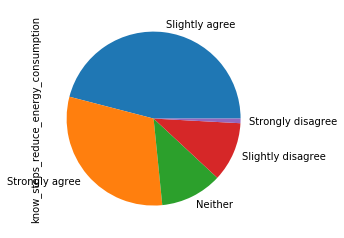

In [55]:
#responsibility
knowledge = survey['know_steps_reduce_energy_consumption'].value_counts()

print(knowledge)

knowledge.plot(kind="pie")

# individual responsible for energy reduction

Slightly agree       87
Strongly agree       53
Slightly disagree    43
Neither              36
Strongly disagree    15
Name: individual_responsible_energy_reduce, dtype: int64


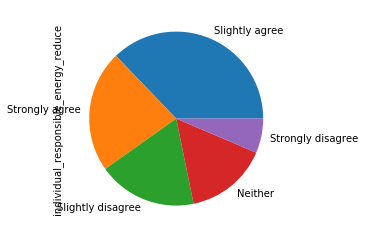

In [56]:
#responsibility
responsible = survey['individual_responsible_energy_reduce'].value_counts()

print(responsible)

responsible.plot(kind="pie")

In [57]:
#recode indidivudal reponse for energy reduction

survey["energy_reduce"] = survey["individual_responsible_energy_reduce"].map({'Slightly disagree':-1, 'Strongly disagree':-1, 'Neither':0, 'Slightly agree':1, 'Strongly agree':1})


# Let's compare EV and non EV homes

In [58]:

#plot EV with other features to see how they relate
groupbyEV =survey.groupby('any_electric_vehicle')

Text(0.5, 1.0, 'temperatureUser')

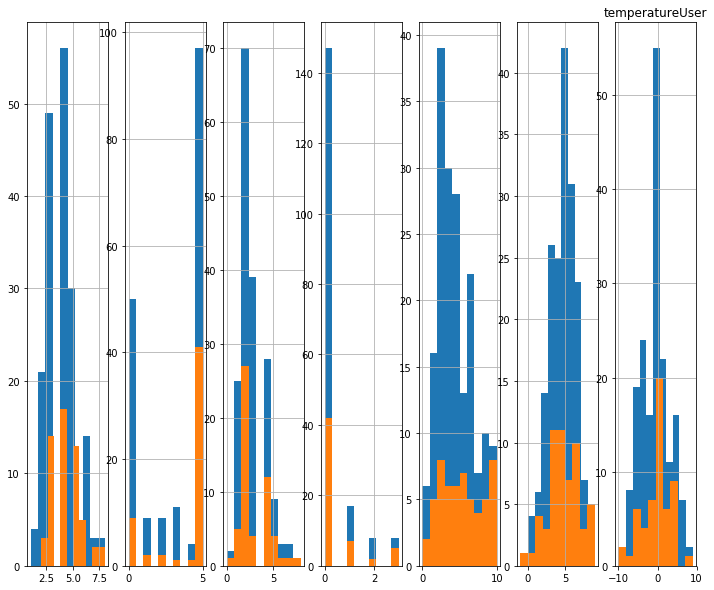

In [59]:
#replot the historgram but with showing off EV and not EV
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(12,10))
for axis, col in zip(axes, ['devices_have', 'at_home', 'total_residents', 'energy_updates', 'energy_savings', 'development', 'temperatureUser']):
    groupbyEV[col].hist(ax=axis)
#plt.legend()
plt.title(col)

                       any_electric_vehicle  dataid
total_annual_income                                
$10,000 - $19,999                       1.0       1
$100,000 - $149,999                     0.0      57
$100,000 - $149,999                     1.0      18
$150,000 - $299,000                     0.0      47
$150,000 - $299,000                     1.0      16
$20,000 - $34,999                       0.0       5
$300,000 - $1,000,000                   0.0      13
$300,000 - $1,000,000                   1.0       6
$35,000 - $49,999                       0.0       4
$50,000 - $74,999                       0.0      19
$50,000 - $74,999                       1.0       3
$75,000 - $99,999                       0.0      20
$75,000 - $99,999                       1.0       7
Less than $10,000                       0.0       1


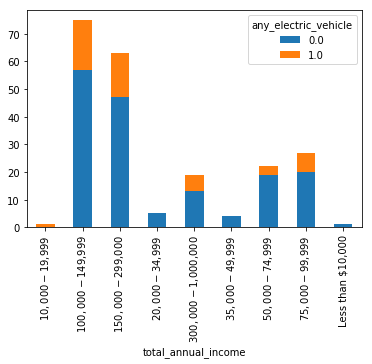

In [60]:
#look at income by Ev versus not EV

incomegrouped = survey.groupby(["total_annual_income", "any_electric_vehicle"]).dataid.count()
incomegrouped = pd.DataFrame(incomegrouped).reset_index()
incomegrouped['sortindex'] = incomegrouped["total_annual_income"].apply(indexsort)
incomegrouped = incomegrouped.sort_values(by=["sortindex"])
incomegrouped = incomegrouped.drop(['sortindex'], axis=1)
incomegrouped = incomegrouped.sort_values(by=["total_annual_income"])
incomegrouped = incomegrouped.set_index("total_annual_income")
print(incomegrouped)

pivot = incomegrouped.pivot(columns='any_electric_vehicle', values='dataid')

pivot = pivot.reindex(incomegrouped.index)
pivot = pivot.drop_duplicates()
pivot


pivot.plot(kind="bar", stacked=True)


                                      any_electric_vehicle  dataid
education_level                                                   
College graduate                                       0.0      62
College graduate                                       1.0      16
High School graduate                                   0.0       1
Postgraduate degree                                    0.0     115
Postgraduate degree                                    1.0      39
Some college/trade/vocational school                   0.0       2
Some college/trade/vocational school                   1.0       1


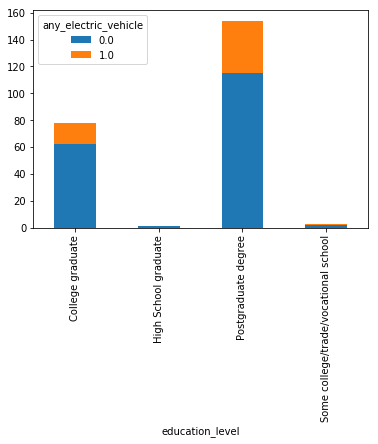

In [61]:
#look at education level by Ev versus not EV

edugrouped = survey.groupby(["education_level", "any_electric_vehicle"]).dataid.count()
edugrouped = pd.DataFrame(edugrouped).reset_index()


edugrouped = edugrouped.sort_values(by=["education_level"])
edugrouped = edugrouped.set_index("education_level")
print(edugrouped)

pivotedu = edugrouped.pivot(columns='any_electric_vehicle', values='dataid')

pivotedu = pivotedu.reindex(edugrouped.index)
pivotedu = pivotedu.drop_duplicates()
pivotedu


pivotedu.plot(kind="bar", stacked=True)


               any_electric_vehicle  dataid
pv_system_own                              
No                              0.0     115
No                              1.0      14
Yes                             0.0      65
Yes                             1.0      42


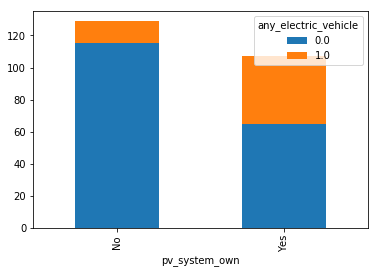

In [62]:
#look at pv system  by Ev versus not EV

pvgrouped = survey.groupby(["pv_system_own", "any_electric_vehicle"]).dataid.count()
pvgrouped = pd.DataFrame(pvgrouped).reset_index()


pvgrouped = pvgrouped.sort_values(by=["pv_system_own"])
pvgrouped = pvgrouped.set_index("pv_system_own")
print(pvgrouped)

pivotpv = pvgrouped.pivot(columns='any_electric_vehicle', values='dataid')

pivotpv = pivotpv.reindex(pvgrouped.index)
pivotpv = pivotpv.drop_duplicates()
pivotpv


pivotpv.plot(kind="bar", stacked=True)


                       any_electric_vehicle  dataid
pv_system_satisfied                                
Neutral                                 0.0       1
Somewhat dissatisfied                   0.0       1
Somewhat satisfied                      0.0      14
Somewhat satisfied                      1.0      12
Very                                    0.0      49
Very                                    1.0      30


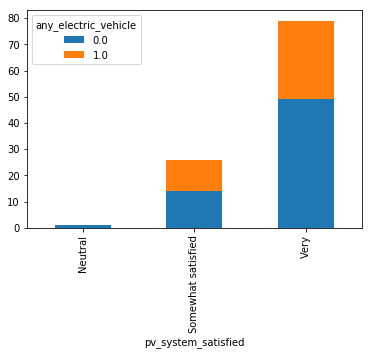

In [63]:
#look at pv system satisfaction by Ev versus not EV

pvsgrouped = survey.groupby(["pv_system_satisfied", "any_electric_vehicle"]).dataid.count()
pvsgrouped = pd.DataFrame(pvsgrouped).reset_index()


pvsgrouped = pvsgrouped.sort_values(by=["pv_system_satisfied"])
pvsgrouped = pvsgrouped.set_index("pv_system_satisfied")
print(pvsgrouped)

pivotpvs = pvsgrouped.pivot(columns='any_electric_vehicle', values='dataid')

pivotpvs = pivotpvs.reindex(pvsgrouped.index)
pivotpvs = pivotpvs.drop_duplicates()
pivotpvs


pivotpvs.plot(kind="bar", stacked=True)


                           any_electric_vehicle  dataid
vehicle_chargn_work_avail                              
I work from home                            0.0      32
I work from home                            1.0      18
No                                          0.0     100
No                                          1.0      24
Yes                                         0.0      38
Yes                                         1.0      13


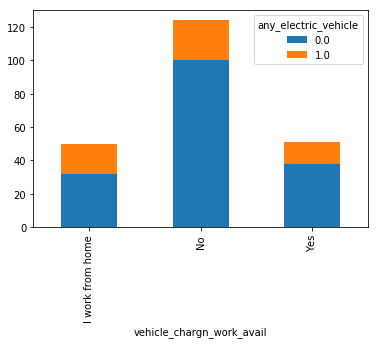

In [64]:
#look at ev charge work avaialble  by Ev versus not EV

evworkgrouped = survey.groupby(["vehicle_chargn_work_avail", "any_electric_vehicle"]).dataid.count()
evworkgrouped = pd.DataFrame(evworkgrouped).reset_index()


evworkgrouped = evworkgrouped.sort_values(by=["vehicle_chargn_work_avail"])
evworkgrouped = evworkgrouped.set_index("vehicle_chargn_work_avail")
print(evworkgrouped)

pivotevwork = evworkgrouped.pivot(columns='any_electric_vehicle', values='dataid')

pivotevwork = pivotevwork.reindex(evworkgrouped.index)
pivotevwork = pivotevwork.drop_duplicates()
pivotevwork


pivotevwork.plot(kind="bar", stacked=True)


                                      any_electric_vehicle  dataid
know_steps_reduce_energy_consumption                              
Neither                                                0.0      22
Neither                                                1.0       5
Slightly agree                                         0.0      79
Slightly agree                                         1.0      27
Slightly disagree                                      0.0      22
Slightly disagree                                      1.0       4
Strongly agree                                         0.0      52
Strongly agree                                         1.0      19
Strongly disagree                                      0.0       2


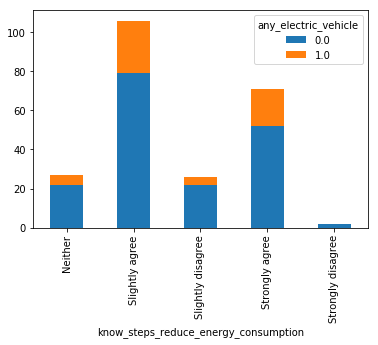

In [65]:
#look at knows steps reduce energy by Ev versus not EV

reducegrouped = survey.groupby(["know_steps_reduce_energy_consumption", "any_electric_vehicle"]).dataid.count()
reducegrouped = pd.DataFrame(reducegrouped).reset_index()

reducegrouped = reducegrouped.sort_values(by=["know_steps_reduce_energy_consumption"])
reducegrouped = reducegrouped.set_index("know_steps_reduce_energy_consumption")
print(reducegrouped)

pivotreduce = reducegrouped.pivot(columns='any_electric_vehicle', values='dataid')

pivotreduce = pivotreduce.reindex(reducegrouped.index)
pivotreduce = pivotreduce.drop_duplicates()
pivotreduce


pivotreduce.plot(kind="bar", stacked=True)


                                      any_electric_vehicle  dataid
individual_responsible_energy_reduce                              
Neither                                                0.0      29
Neither                                                1.0       5
Slightly agree                                         0.0      64
Slightly agree                                         1.0      23
Slightly disagree                                      0.0      32
Slightly disagree                                      1.0      11
Strongly agree                                         0.0      40
Strongly agree                                         1.0      12
Strongly disagree                                      0.0      11
Strongly disagree                                      1.0       4


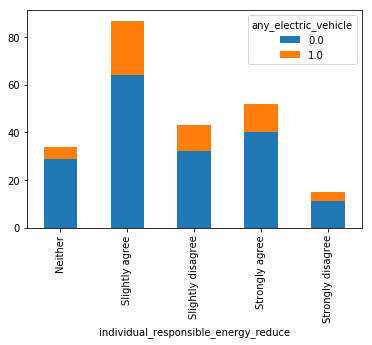

In [66]:
#look at indidiuval response to energy by Ev versus not EV

indigrouped = survey.groupby(["individual_responsible_energy_reduce", "any_electric_vehicle"]).dataid.count()
indigrouped = pd.DataFrame(indigrouped).reset_index()

indigrouped = indigrouped.sort_values(by=["individual_responsible_energy_reduce"])
indigrouped = indigrouped.set_index("individual_responsible_energy_reduce")
print(indigrouped)

pivotindi = indigrouped.pivot(columns='any_electric_vehicle', values='dataid')

pivotindi = pivotindi.reindex(indigrouped.index)
pivotindi = pivotindi.drop_duplicates()
pivotindi


pivotindi.plot(kind="bar", stacked=True)


# Let's look at the Survey features that will help inform 

In [67]:
survey_model = survey.copy()

In [68]:
survey_model = survey_model[['dataid','any_electric_vehicle','at_home', 'total_annual_income', 'total_residents', 'education_level', 'pv_system_own', 'energy_updates', 'temperatureUser', 'devices_have', 'energy_savings', 'development', 'energy_reduce']]

In [69]:
survey_model.head()

,dataid,any_electric_vehicle,at_home,total_annual_income,total_residents,education_level,pv_system_own,energy_updates,temperatureUser,devices_have,energy_savings,development,energy_reduce
0,﻿18,0.0,2,"$100,000 - $149,999",1.0,Postgraduate degree,Yes,0,1,3,1,2.0,0.0
1,26,1.0,0,"$150,000 - $299,000",2.0,Postgraduate degree,Yes,0,2,4,3,3.0,-1.0
2,43,1.0,5,"$10,000 - $19,999",2.0,College graduate,Yes,0,5,2,4,0.0,1.0
3,50,0.0,5,"$300,000 - $1,000,000",2.0,Postgraduate degree,Yes,0,-2,5,6,4.0,1.0
4,125,0.0,5,"Less than $10,000",2.0,Postgraduate degree,No,3,0,8,9,3.0,0.0


In [70]:
# need to compress into less features

#switch pv to 1 nad 0
survey_model["PV"] = survey_model["pv_system_own"].map({'Yes':1, 'No':0})



In [71]:
#find average number of days at home and if more than -1 if less 1 if in IQR than 0

Q1days = survey_model["at_home"].quantile(q=.25)
Q3days = survey_model["at_home"].quantile(q=.75)
maxdays = max(survey_model["at_home"])
mindays = min(survey_model["at_home"])

def hometime(value):
    if value > Q3days:
        return -1
    elif value < Q1days:
        return 1
    else:
        return 0
    
survey_model["at_home_days"] = survey_model["at_home"].apply(hometime)
        


In [72]:
#find average number of total residents and if more than -1 if less 1 if in IQR than 0

Q1residents = survey_model["total_residents"].quantile(q=.25)
Q3resients = survey_model["total_residents"].quantile(q=.75)


def people(value):
    if value > Q3days:
        return -1
    elif value < Q1days:
        return 1
    else:
        return 0
    
survey_model["total_residents_home"] = survey_model["total_residents"].apply(people)
        


In [73]:

survey_model.columns[7:16]

Index(['energy_updates', 'temperatureUser', 'devices_have', 'energy_savings',
       'development', 'energy_reduce', 'PV', 'at_home_days',
       'total_residents_home'],
      dtype='object')

In [74]:
#sum all of the columns that are postiive number if good for environemntly frienldy, enregy conservation and negative if not

survey_model["energy_helper"] = survey_model[survey_model.columns[7:16]].sum(axis=1)
survey_model.head()

,dataid,any_electric_vehicle,at_home,total_annual_income,total_residents,education_level,pv_system_own,energy_updates,temperatureUser,devices_have,energy_savings,development,energy_reduce,PV,at_home_days,total_residents_home,energy_helper
0,﻿18,0.0,2,"$100,000 - $149,999",1.0,Postgraduate degree,Yes,0,1,3,1,2.0,0.0,1,0,0,8.0
1,26,1.0,0,"$150,000 - $299,000",2.0,Postgraduate degree,Yes,0,2,4,3,3.0,-1.0,1,1,0,13.0
2,43,1.0,5,"$10,000 - $19,999",2.0,College graduate,Yes,0,5,2,4,0.0,1.0,1,0,0,13.0
3,50,0.0,5,"$300,000 - $1,000,000",2.0,Postgraduate degree,Yes,0,-2,5,6,4.0,1.0,1,0,0,15.0
4,125,0.0,5,"Less than $10,000",2.0,Postgraduate degree,No,3,0,8,9,3.0,0.0,0,0,0,23.0


In [75]:
#instead of creating multiple dummy variable income and educaiton level will be turned into binary variables

#education - postgrad or not

# recode to be Austin or other
survey_model['postgrad'] = np.where(survey_model['education_level']=='Postgraduate degree', 1, 0)

#income - greater than and less than 100K
survey_model["income"] = survey_model["total_annual_income"].map({'Less than $10,000':0, '$10,000 - $19,999':0, '$20,000 - $34,999':0, '$35,000 - $49,999':0, '$50,000 - $74,999':0,'$75,000 - $99,999':0, '$100,000 - $149,999':1, '$150,000 - $299,000':1, '$300,000 - $1,000,000':1 })

In [76]:
survey_modeled = survey_model.copy()

In [77]:
survey_modeled = survey_modeled[['dataid','any_electric_vehicle','energy_helper', 'income', 'postgrad']]

In [78]:
#count NA values
survey_modeled.isna().sum()

dataid                   0
any_electric_vehicle     3
energy_helper            0
income                  20
postgrad                 0
dtype: int64

In [79]:
survey_modeled.fillna(0, inplace=True)
survey_modeled.isna().sum()

dataid                  0
any_electric_vehicle    0
energy_helper           0
income                  0
postgrad                0
dtype: int64

# test if these features influence EV

In [80]:

# Specify the name of the target
target = 'any_electric_vehicle'

# Get the target vector
y= survey_modeled[target]

features = survey_modeled.drop('dataid', axis=1)
# Specify the name of the features
features = list(features.drop(target,axis=1).columns)


# Get the feature vector
x= survey_modeled[features]

In [81]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (using random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

In [82]:
#oversampling
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [83]:
#standardize
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# Standardize the training data
x_train_res = std_scaler.fit_transform(x_train_res)

# Standardize the testing data
X_test = std_scaler.transform(X_test)

C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [84]:

import statsmodels.api as statsmodels

logit_model = statsmodels.Logit(y_train_res, x_train_res)

result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.658501
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.050     
Dependent Variable: y                AIC:              343.1527  
Date:               2019-04-30 08:47 BIC:              353.7882  
No. Observations:   256              Log-Likelihood:   -168.58   
Df Model:           2                LL-Null:          -177.45   
Df Residuals:       253              LLR p-value:      0.00014063
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
--------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1       0.4625      0.1410    3.2789    0.0010     0.1860    0.7389
x2       0.1001      0.1367    0.7324    0.4639    -0.

In [85]:
features

['energy_helper', 'income', 'postgrad']